In [1]:
import keras
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from keras.layers import Dense

from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


In [2]:
from numpy import genfromtxt
EEG = genfromtxt("C:/Users/SoobinYim/workspace/Confusion during MOOC/EEG_data.csv", delimiter=",")

In [3]:
#6의 raw데이터에 이상이 있으므로 6을 제외하고 분석
EEG=EEG[1:,:]
EEG=pd.DataFrame(EEG)

In [4]:
remove_6=EEG[EEG[0]==6].index
print(EEG.shape, remove_6.shape)

(12811, 15) (1275,)


In [5]:
EEG=EEG.drop(remove_6)
print(EEG.shape)

(11536, 15)


In [6]:
EEG=EEG.values

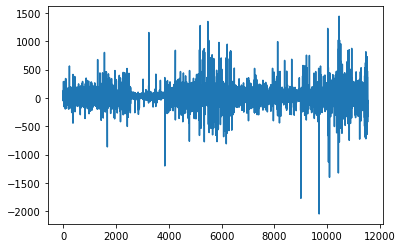

In [7]:
plt.plot(pd.DataFrame(EEG)[4]) #EEG 말끔하게 출력 확인

In [8]:
X=EEG
y = EEG[:, -1]
print(X.shape,y.shape)

(11536, 15) (11536,)


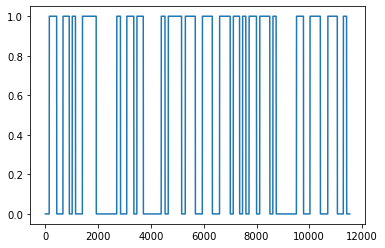

In [10]:
plt.plot(y)

In [9]:
#동영상, raw, 주파수 data 사용
X1=pd.DataFrame(X)
X1=X1.drop(X1.columns[[0,2,3,13,14]], axis='columns')
X1.head()

,1,4,5,6,7,8,9,10,11,12
0,0.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0
1,0.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0
2,0.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0
3,0.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0
4,0.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0


In [11]:
#사람 정보, raw, 주파수 data 사용
X2=pd.DataFrame(X)
X2=X2.drop(X2.columns[[1,2,3,13,14]], axis='columns')
X2.head()

,0,4,5,6,7,8,9,10,11,12
0,0.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0
1,0.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0
2,0.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0
3,0.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0
4,0.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0


In [12]:
#동영상, raw, 주파수 data 사용
X3=pd.DataFrame(X)
X3=X3.drop(X3.columns[[0,2,3,4,13,14]], axis='columns')
X3.head()

,1,5,6,7,8,9,10,11,12
0,0.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0
1,0.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0
2,0.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0
3,0.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0
4,0.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0


In [13]:
#사람 정보, 주파수 data 사용
X4=pd.DataFrame(X)
X4=X4.drop(X4.columns[[1,2,3,4,13,14]], axis='columns')
X4.head()

,0,5,6,7,8,9,10,11,12
0,0.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0
1,0.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0
2,0.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0
3,0.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0
4,0.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0


In [14]:
X1=X1.values
X2=X2.values
X3=X3.values
X4=X4.values

In [85]:
#X=X1
#X=X2
X=X3
#X=X4

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=14)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5768, 9) (5768, 9) (5768,) (5768,)


In [123]:
from tensorflow.keras import utils as np_utils
#one-hot encoding
y_train      = np_utils.to_categorical(y_train-1)
y_test       = np_utils.to_categorical(y_test-1)

print(y_train.shape, y_test.shape)

(5768, 1) (5768, 1)


In [124]:
X_train = X_train.reshape(X_train.shape[0], 3, 3,1)
X_test = X_test.reshape(X_test.shape[0], 3, 3,1)

print(X_train.shape, X_test.shape)

(5768, 3, 3, 1) (5768, 3, 3, 1)


In [125]:
from keras.models import Sequential, Model 
from keras.utils import np_utils
from keras.layers import  BatchNormalization,Dense, Conv2D, Convolution2D, MaxPooling2D, Dropout, Flatten, TimeDistributed, InputLayer, LSTM
from keras.layers import Input, Reshape, Activation, add, Add
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

In [130]:
def basic_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(9, activation = 'softmax'))
    
    model.add(Dense(1, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

model = basic_cnn()
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_163 (Conv2D)          (None, 3, 3, 50)          500       
_________________________________________________________________
activation_161 (Activation)  (None, 3, 3, 50)          0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 3, 3, 50)          22550     
_________________________________________________________________
activation_162 (Activation)  (None, 3, 3, 50)          0         
_________________________________________________________________
max_pooling2d_133 (MaxPoolin (None, 1, 1, 50)          0         
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 1, 1, 50)          22550     
_________________________________________________________________
activation_163 (Activation)  (None, 1, 1, 50)        

In [131]:
hist=model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test,y_test))

Train on 5768 samples, validate on 5768 samples
Epoch 1/100
5768/5768 [==============================] - 2s 414us/step - loss: nan - accuracy: 0.0087 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
5768/5768 [==============================] - 1s 227us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
5768/5768 [==============================] - 1s 226us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
5768/5768 [==============================] - 1s 229us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
5768/5768 [==============================] - 1s 229us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
5768/5768 [==============================] - 1s 229us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100
5768/5768 [==============================] - 1s 22

5768/5768 [==============================] - 1s 228us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 56/100
5768/5768 [==============================] - 1s 226us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 57/100
5768/5768 [==============================] - 1s 227us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 58/100
5768/5768 [==============================] - 1s 228us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 59/100
5768/5768 [==============================] - 1s 225us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 60/100
5768/5768 [==============================] - 1s 228us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 61/100
5768/5768 [==============================] - 1s 228us/step - loss: nan - accuracy: 0.0000e+00 - val_

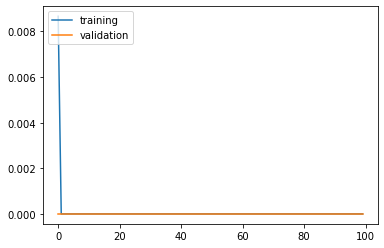

In [132]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [133]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

5768/5768 [==============================] - 1s 125us/step
Test accuracy:  0.0


In [6]:
pip install librosa

import librosa
import librosa.display

train=[]
train.append(np.abs(librosa.stft(X_train[:,0])))